In [1]:
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd


start_time = 1190146243
end_time = 1192994591

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data



import mwclient
from itertools import islice
import calendar
from urllib.parse import unquote
from urllib.parse import quote
import time

site = mwclient.Site('en.wikipedia.org')

def get_page(title):
    page = site.pages[unquote(unquote(title))]
    return page

In [34]:
cat = site.Categories["Human_communication"]

{{About|humans as a species}}
{{redirect|Human race|the concept of human races|Race (human classification)}}
{{pp-semi-indef}}
{{pp-move-indef}}
{{Use dmy dates|date=September 2017}}
{{speciesbox
| name = Human<ref name=msw3>{{MSW3 Groves | pages = | id = 12100795}}</ref>
| image = Akha cropped hires.JPG <!--The choice of image has been discussed at length. Please don't change it without first obtaining consensus. Also used at Akha people (section Dress)-->
| image_caption = An [[adult]] human [[man|male]] (left) and [[woman|female]] (right) in Northern [[Thailand]].
| fossil_range = {{Fossil range|0.3|0}} <small>[[Middle Pleistocene]] – Recent</small>
| taxon = Homo sapiens
| authority = [[Carl Linnaeus|Linnaeus]], 1758
| subdivision_ranks = [[Subspecies]]
| subdivision =
[[Extinct|{{extinct}}]]''[[Homo sapiens idaltu]]'' <small>White ''et al.'', 2003</small><br />
''[[Homo sapiens sapiens]]''
| range_map = World human population density map.png
| range_map_caption = ''[[Homo sapiens]

In [23]:
df = load_data("data/dump/revision_records.pkl")

In [30]:
i = 0
for word in (set(df.index.get_level_values(0))):
    if i == 10:
        break
    i += 1
    print(word)

Music_of_the_United_States
Uncle_Kracker
Faisal_I_of_Iraq
Carcass_(band)
Teddy_Boy
Anterior_cruciate_ligament
Yanomami
Tyranny_of_the_majority
Kathleen_Hanna
Encino_Man


In [39]:
word_series = load_data("data/dump/hot_words_100000.pkl")
words_list = word_series.index
delta = 10000
j = 4

In [40]:
load 

10000

In [79]:
meta = load_data("data/dump/metadata_5000-10000.pkl")

In [83]:
meta["Moscow_Kremlin"]

{'categories': ['Category:1495 establishments in Europe',
  'Category:15th-century establishments in Russia',
  'Category:All articles needing additional references',
  'Category:Articles containing Russian-language text',
  'Category:Articles needing additional references from February 2017',
  'Category:Buildings and structures in Moscow',
  'Category:CS1 Russian-language sources (ru)',
  'Category:Castles in Russia',
  'Category:Coordinates on Wikidata',
  'Category:EngvarB from September 2016',
  'Category:Kremlins',
  'Category:Moscow Kremlin',
  'Category:Official residences in Russia',
  'Category:Pages using multiple image with manual scaled images',
  'Category:Palaces in Russia',
  'Category:Presidential residences',
  'Category:Royal residences in Russia',
  'Category:Tourist attractions in Moscow',
  'Category:Use dmy dates from August 2012',
  'Category:Wikipedia articles with GND identifiers',
  'Category:World Heritage Sites in Russia'],
 'image_num': 25,
 'languages': [

In [59]:
word_series.to_csv("data/test.csv")

In [85]:
pd.DataFrame({1:{1:1,2:1},2:{1:2,2:2}})

,1,2
1,1,2
2,1,2


In [87]:
import ipywidgets

In [39]:
import scipy.stats as ss

In [40]:
x = np.linspace(-15, 15, 9)

In [43]:
ss.kstest(x, cdf = lambda x: (x + 15) / 30)

KstestResult(statistic=0.11111111111111116, pvalue=0.9998867320298482)

In [2]:
word_series = load_data("data/dump/hot_words_100000.pkl")

In [11]:
word_series.to_csv("data/test.csv")

'George_Halas'

In [12]:
data = load_data("data/dump/word_access_timestamps_02000-03000.pkl")

In [38]:
series = data['World_War_II']

In [47]:
from datetime import datetime
def timestamps_count_by_day(stamps):
    listdate=[]
    for i in range(0,len(stamps)):
        a=float(stamps[i])
        listdate.append(datetime.fromtimestamp(a))
        
    X=[]
    for i in range(0,len(listdate)):
        if(listdate[i].month==9):
            value=listdate[i].day-18
        else:
            value=listdate[i].day+12
        X.append(value)
    Z = [0] * 34
    for value in X:
        Z[value] += 1
    return Z

In [49]:
seq = timestamps_count_by_day(series)

[290,
 2087,
 1789,
 1587,
 5300,
 2079,
 5348,
 2263,
 2046,
 2171,
 1588,
 1258,
 1708,
 2229,
 2426,
 2315,
 2089,
 1891,
 1229,
 1461,
 2051,
 2171,
 1877,
 2147,
 1659,
 1231,
 1592,
 2114,
 2278,
 2062,
 2075,
 1754,
 1195,
 1000]

In [77]:
import numpy as np
import pylab

def thresholding_algo(y, lag=10, threshold=3.5, influence=10):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [78]:
result = thresholding_algo(seq)

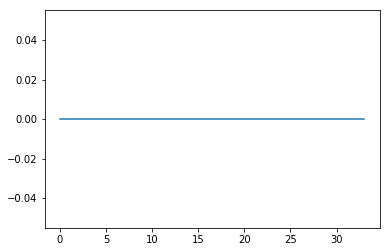

In [79]:
import matplotlib.pyplot as plt
plt.plot(result['signals'])

In [32]:
def seperate_list(array, bins = 10):
    arrary1 = sorted(array)
    cut = []
    delta = len(arrary1) // bins
    print(delta)
    for j in range(0, bins):
        cut.append(arrary1[delta * j])
    cut.append(arrary1[-1])
    return cut

In [33]:
a = [1,3,2,4,5,6,7,8,9,10]
seperate_list(a,3)

3


[1, 4, 7, 10]

In [3]:
a


[1, 3, 2]